<a href="https://colab.research.google.com/github/kursatkara/18.337_2015/blob/master/03_2_Unitary_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unitary Transformations**

In [45]:
# Code from the textbook

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

#theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
#theta = np.array([0.0, 0.0, 0.0])
#theta = np.array([np.pi/4, np.pi/4, np.pi/4])
theta = np.array([0, 0, -np.pi/2])

# Scale x, then y, then z
#Sigma = np.diag([2, 0.5, 1.5])
Sigma = np.diag([1, 1, 0.5])

# Rotation about x axis
Rx = np.array([[                  1,                 0,                 0],
               [                  0,  np.cos(theta[0]), -np.sin(theta[0])],
               [                  0,  np.sin(theta[0]),  np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[   np.cos(theta[1]),                 0, np.sin(theta[1])],
               [                  0,                 1,                0],
               [  -np.sin(theta[1]),                 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[   np.cos(theta[2]), -np.sin(theta[2]),                0],
               [   np.sin(theta[2]),  np.cos(theta[2]),                0],
               [                  0,                 0,                1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

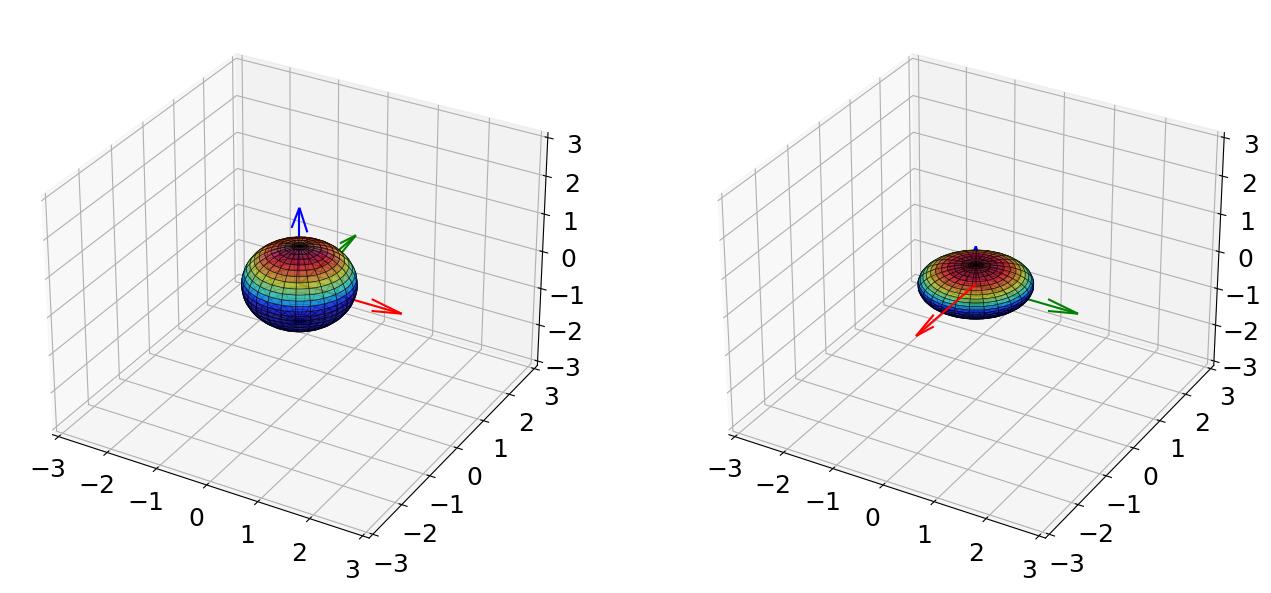

In [46]:
# Plot sphere
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(     0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
surf1 = ax1.plot_surface(x, y, z, cmap='jet',alpha=0.6,facecolors=plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-3, 3)
ax1.set_ylim3d(-3, 3)
ax1.set_zlim3d(-3, 3)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
# Unitary Transformation
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-3, 3)
ax2.set_ylim3d(-3, 3)
ax2.set_zlim3d(-3, 3)

# Origin point for the vectors
origin = np.array([0, 0, 0])

# Principal directions as vectors
v1 = np.array([1, 0, 0])  # Vector for principal direction 1
v2 = np.array([0, 1, 0])  # Vector for principal direction 2
v3 = np.array([0, 0, 1])    # Vector for principal direction 3

# Plot arrows for principal directions
ax1.quiver(*origin, *v1, length=2, color='r', normalize=True)
ax1.quiver(*origin, *v2, length=2, color='g', normalize=True)
ax1.quiver(*origin, *v3, length=2, color='b', normalize=True)
# Set labels and show plot
#ax1.set_xlabel('X axis')
#ax1.set_ylabel('Y axis')
#ax1.set_zlabel('Z axis')

# Transformation of the Principal directions
xv1 = X @ np.array([1, 0, 0])  # Vector for principal direction 1
xv2 = X @ np.array([0, 1, 0])  # Vector for principal direction 2
xv3 = X @ np.array([0, 0, 1])    # Vector for principal direction 3
# Plot arrows for Transformed principal directions
ax2.quiver(*origin, *xv1, length=2, color='r')#, normalize=True)
ax2.quiver(*origin, *xv2, length=2, color='g')#, normalize=True)
ax2.quiver(*origin, *xv3, length=2, color='b')#, normalize=True)
# Set labels and show plot
#ax2.set_xlabel('X axis')
#ax2.set_ylabel('Y axis')
#ax2.set_zlabel('Z axis')

plt.show()